In [ ]:
!nvidia-smi

Mon Aug 28 00:58:50 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA A100-SXM...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   33C    P0    46W / 400W |      0MiB / 40960MiB |      0%      Default |
|                               |                      |             Disabled |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

# <Font color = 'dodgerblue'>**HW1-part-B-ZeroShot Classification- 8 Points**
- **You have to submit two files for this part of the HW**
  >(1) ipynb (colab notebook) and<br>
  >(2) pdf file (pdf version of the colab file).**
- **Files should be named as follows**:
>FirstName_LastName_HW_1B**

# <Font color = 'dodgerblue'>**Question: Zero Shot Classification using Huggingface Pipeline  - 8 Points.**

This task involves practical application of zero-shot classification to categorize restaurant review sentences. By leveraging a pre-trained model , students will gain hands-on experience in utilizing natural language inference techniques for text classification.




# <Font color = 'dodgerblue'>**Zero Shot Classification - Brief Overview** </font>

### Introduction to Natural Language Inference (NLI)

Natural Language Inference (NLI) is a task in natural language processing where a model determines the relationship between two sentences, often referred to as the premise and the hypothesis. The relationship might be **entailment (the hypothesis follows from the premise)**, contradiction, or neutrality.

### Zero-Shot Classification Using Hugging Face's Pipeline

Building on NLI, Hugging Face's zero-shot classification leverages entailment (hypotheses follows from the premise) relationships to classify text into various categories.

1. **Premise:** The input text, like a restaurant review.

2. **Labels**:<br>
Possible labels (categories) represent distinct classifications within a given problem. In the context of the review dataset that you will be working with, the possible labels correspond to specific aspects of a dining experience. The labels include: 'food,' referring to the quality and taste of the dishes; 'ambiance,' reflecting the overall atmosphere and decor of the restaurant; 'service,' pertaining to the staff's attentiveness and professionalism; and 'other,' a category that encompasses any additional comments or observations not covered by the aforementioned labels.

3. **Hypothesis Template:**<br>
A specially formatted string that transforms each label into an NLI-style hypothesis. An example of hypothesis template could be **"This example is {}."**. The {} is a placeholder where the candidate label is inserted, allowing the model to consider each label as a potential classification.

3. **Forming Hypotheses using template and labels:**<br>
Based on the label examples and hypothesis template, the resulting hypotheses will be:
   - "This example is food."
   - "This example is ambiance."
   - "This example is service."
   - "This example is other."

4. **Zero-Shot Classification Process:**
   - **Step 1:** Combine premise and hypotheses.
   - **Step 2:** Utilize a pre-trained NLI model to calculate entailment probabilities (probability that hypothesis follows from premise) for each hypothesis.
   - **Step 3:** Return the probabilities for each label.

### Example

Given a review like "The food was excellent," the model might return:
   - food: 0.95
   - ambiance: 0.05
   - service: 0.02
   - other: 0.023

**The probability of 0.95 for the label "food" means that the model has a 95% confidence that the premise "The food was excellent" entails the hypothesis "This example is food."**  The other probabilities represent the model's confidence for the remaining labels.

### Conclusion

Hugging Face's zero-shot classification pipeline calculates probabilities for multiple categories by leveraging NLI concepts. This approach offers flexibility in text analysis without the need for task-specific training, providing insights into the relevance of different labels to a given text.




# <Font color = 'dodgerblue'>**Data and Task Description**

- For this Question, you are provided a csv file (review_sentences.csv) that has 584 sentences from restautant reviews from Yelp. You have to classify the sentences in to four labels: `["food," "ambiance," "service," and "other."]`.
- The csv file is availble in eLearning in 0_Data folder.
- You will use a zero-shot-classification pipleine from huggingface to make predictions.
- You are also provided the actual labels. You will use these labels to access the accuracy of the model.

# <font color = 'indian red'> **Install/Import Modules**

In [ ]:
if 'google.colab' in str(get_ipython()):
    !pip install transformers -U -qq
    !pip install sentencepiece -U -qq

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 69.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 36.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 121.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 89.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 18.3 MB/s eta 0:00:00


In [ ]:
# Import the pandas library for data manipulation and analysis
import pandas as pd

# Import the numpy library for numerical computing
import numpy as np

# Import the Matplotlib library for creating visualizations such as plots, graphs, etc.
import matplotlib.pyplot as plt

# Import the pathlib library for working with file paths in a way that is cross-platform
from pathlib import Path

# Import functions for metrics computation like confusion matrix, and accuracy
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, classification_report

# Import the transformers library for state-of-the-art Natural Language Processing (NLP) models like BERT, GPT, etc.
from transformers import pipeline


In [ ]:
# Import the torch library. PyTorch is a Python library for deep learning.
import torch

# Check if a CUDA-enabled GPU is available for PyTorch.
# This can speed up neural network computations.
torch.cuda.is_available()

True

In [ ]:
!pip show transformers

Name: transformers
Version: 4.32.0
Summary: State-of-the-art Machine Learning for JAX, PyTorch and TensorFlow
Home-page: https://github.com/huggingface/transformers
Author: The Hugging Face team (past and future) with the help of all our contributors (https://github.com/huggingface/transformers/graphs/contributors)
Author-email: transformers@huggingface.co
License: Apache 2.0 License
Location: /usr/local/lib/python3.10/dist-packages
Requires: filelock, huggingface-hub, numpy, packaging, pyyaml, regex, requests, safetensors, tokenizers, tqdm
Required-by: 


# <font color = 'indian red'>**Specify Base folder for Project**

In [ ]:
if 'google.colab' in str(get_ipython()):
  from google.colab import drive
  drive.mount('/content/drive')
  base_folder = Path('/content/drive/MyDrive/NLP') # MAKE SURE TO CHANGE THE PATH

# (the else block is required only if you have local GPU machine, other wise you can ignore the else block)
else:
  base_folder = Path('/home/harpreet/Insync/google_drive_shaannoor/data') # MAKE SURE TO CHANGE THE PATH



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## <Font color = 'dodgerblue'>**Create DataFrame**

In [ ]:
data_folder = base_folder/'datasets/yelp_food_service_ambience'  # MAKE SURE TO CHANGE THE PATH

In [ ]:
# location of train and test files
data_file = data_folder /'review_sentences.csv'

In [ ]:
# creating Pandas Dataframe
train_data = pd.read_csv(data_file, index_col=0, encoding='ISO-8859-1')

In [ ]:
# print shape of the datasets
print(f'Shape of Training data set is : {train_data.shape}')

Shape of Training data set is : (584, 2)


In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 584 entries, 0 to 599
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   text         584 non-null    object
 1   final_label  584 non-null    object
dtypes: object(2)
memory usage: 13.7+ KB


In [ ]:
# check first five examples
train_data.head()

,text,final_label
sentences,,
0,"If you love unagi (eel) on rice, you'll absolu...",food
1,But it is definitely worth the wait.,service
3,Sometimes get the Pho w/ rare beef which is de...,food
4,"Other items on this menu was a crab soup, duck...",food
5,I visited the restaurant for lunch and arrived...,other


In [ ]:
# check disytribution of labels
train_data['final_label'].value_counts()

food        279
other       139
service     120
ambiance     46
Name: final_label, dtype: int64

## <Font color = 'dodgerblue'>**Load Pipeline**

In [ ]:
# Load zero shot classification pipleine - do not pass any model. We will use the default model
# use pytorch as framework and move the pipleine to GPU
# syntax : zero_shot_classifier = pipeline(name-of-pipeline, framework=, device =)

zero_shot_classifier = pipeline("zero-shot-classification",
                      framework='pt',
                     device = 0)

No model was supplied, defaulted to facebook/bart-large-mnli and revision c626438 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.


## <Font color = 'dodgerblue'>**Task1 : Base experiment**.

- **In this Task you will pass all the four labels to the classifier.**

### <Font color = 'dodgerblue'>**Create a list of reviews**

In [ ]:
# create a list of reviews (hint use column.tolist() to convert numpy array series to python list)
texts_train = train_data['text'].tolist()  # CODE HERE

# list of labels
candidate_labels = train_data['final_label'].unique().tolist() # CODE HERE
candidate_labels

['food', 'service', 'other', 'ambiance']

### <Font color = 'dodgerblue'>**Get Probbailities**

Pass the list of text and labels you created in the previous step to the classifier to get predictions.

The syntax is : **```probs = zero_shot_classifier(sequences= , candidate_labels =  )```**

In [ ]:
probs = zero_shot_classifier(sequences = texts_train, candidate_labels = candidate_labels)

In [ ]:
probs[0: 3]

[{'sequence': "If you love unagi (eel) on rice, you'll absolutely enjoy their version.",
  'labels': ['food', 'ambiance', 'service', 'other'],
  'scores': [0.9423721432685852,
   0.02349521778523922,
   0.02131688967347145,
   0.012815786525607109]},
 {'sequence': 'But it is definitely worth the wait.',
  'labels': ['other', 'service', 'ambiance', 'food'],
  'scores': [0.49058297276496887,
   0.25347885489463806,
   0.20231053233146667,
   0.05362766236066818]},
 {'sequence': 'Sometimes get the Pho w/ rare beef which is decent.',
  'labels': ['food', 'other', 'service', 'ambiance'],
  'scores': [0.7790167927742004,
   0.10868193954229355,
   0.08358323574066162,
   0.028718072921037674]}]

In [ ]:
# DO NOT RUN THIS CELL - This cells gives you an idea of the expected output

[{'sequence': "If you love unagi (eel) on rice, you'll absolutely enjoy their version.",
  'labels': ['food', 'ambiance', 'service', 'other'],
  'scores': [0.9423722624778748,
   0.023495187982916832,
   0.021316785365343094,
   0.012815762311220169]},
 {'sequence': 'But it is definitely worth the wait.',
  'labels': ['other', 'service', 'ambiance', 'food'],
  'scores': [0.4905829429626465,
   0.2534791827201843,
   0.20231030881404877,
   0.05362754687666893]},
 {'sequence': 'Sometimes get the Pho w/ rare beef which is decent.',
  'labels': ['food', 'other', 'service', 'ambiance'],
  'scores': [0.7790170311927795,
   0.10868176817893982,
   0.08358323574066162,
   0.02871803753077984]}]

### <Font color = 'dodgerblue'>**Get Predictions**
- The output from the classifier will give you the probbaility for each label
- The label with the highest probbaility should be your prediction
- You might need to use more than one line of the code to complete this step

In [ ]:
predictions =  [review['labels'][np.argmax(review['scores'])] for review in probs]

In [ ]:
# get first five preeictions
predictions[0:5]

['food', 'other', 'food', 'food', 'food']

In [ ]:
# DO NOT RUN THIS CELL - This cells gives you an idea of the expected output

['food', 'other', 'food', 'food', 'food']

### <Font color = 'dodgerblue'>**Accuracy**
- You might need to use more than one line of the code to complete this step
- Now you have the actual Label and predicted Label for each sentence.
- Calculate the overall acacuracy (Hint : you can use accuracy_score form from sklearn - `from sklearn.metrics import accuracy_score`


In [ ]:
from sklearn.metrics import *
accuracy =  accuracy_score(predictions, train_data['final_label'].tolist())*100
accuracy

66.6095890410959

In [ ]:
# DO NOT RUN THIS CELL - If you have done everything correctly, you should get accurtacy close to reported below
accuracy

66.6095890410959

### <Font color = 'dodgerblue'>**Classification Report**
- Print the classification report
- HINT- `from sklearn.metrics import classification_report`

In [ ]:
train_data['final_label'].value_counts()

food        279
other       139
service     120
ambiance     46
Name: final_label, dtype: int64

In [ ]:
# print classification report
class_report =  classification_report(train_data['final_label'].tolist(), predictions)
print(class_report)

              precision    recall  f1-score   support

    ambiance       0.39      0.33      0.36        46
        food       0.76      0.84      0.80       279
       other       0.52      0.54      0.53       139
     service       0.69      0.54      0.61       120

    accuracy                           0.67       584
   macro avg       0.59      0.56      0.57       584
weighted avg       0.66      0.67      0.66       584



In [ ]:
# DO NOT RUN THIS CELL - If you have done everything correctly, your report should look similar

              precision    recall  f1-score   support

    ambiance       0.39      0.33      0.36        46
        food       0.76      0.84      0.80       279
       other       0.52      0.54      0.53       139
     service       0.69      0.54      0.61       120

    accuracy                           0.67       584
   macro avg       0.59      0.56      0.57       584
weighted avg       0.66      0.67      0.66       584



###<Font color = 'dodgerblue'>**Conclusion from the classification report** </font>

What do you conclude from the classification report?

YOUR RESPONSE HERE:

The above classification report consists of Precision, Recall,  F-1 score and Support (i.e  number of actual samples for that category) for each of the 4 labels.

Accuracy - The model achieves an overall accuracy of 67%, meaning it correctly classified 67% of the total instances across all classes.

Precision = % of accurate predictions for positive labels. From the report we can see that the label 'food' has highest precision (76%) and 'ambiance' has the lowest precision (39%). Moreover, macro avg precision (i.e. arithmetic mean) of all labels is 59% and weighted avg (where weights are support/number of samples in that label) is 66%.

Recall - % of accurate predictions for actual positives. From the report we can see that the label 'food' has highest accuracy (84%) and 'ambiance' has the lowest accuracy (33%). Moreover, macro avg precision (i.e. arithmetic mean) of all labels is 56% and weighted avg (where weights are support/number of samples in that label) is 67%.

F-1 - The F1-scores strike a balance between precision and recall using harmonic mean of both. The "food" class leads with the highest F1-score of 0.80, signifying an effective equilibrium between precision and recall. Following closely is the "service" class with an F1-score of 0.61, while the "other" class achieves an F1-score of 0.53. In contrast, the "ambiance" class lags behind with the lowest F1-score of 0.36, indicating a less harmonious performance between precision and recall.

In conclusion, the model works reasonably well overall, with a 67% accuracy. Nevertheless, there are differences in performance between classes. The "food" category performs best, whereas the "ambiance" category has the lowest precision and recall, resulting in the lowest F1 score. The selection of evaluation metrics and subsequent analysis may be influenced by the categorization task's specific goals and priorities.



### <Font color = 'dodgerblue'>**Confusion Matrix**
- You might need to use more than one line of the code to complete this step
- Print confusionm matrix
- Hint:use ConfusionMatrixDisplay.from_predictions from sklearn

In [ ]:
confusion_matrix(train_data['final_label'].tolist(), predictions, normalize = 'true')

array([[0.32608696, 0.2826087 , 0.36956522, 0.02173913],
       [0.01075269, 0.83870968, 0.12903226, 0.02150538],
       [0.11510791, 0.18705036, 0.53956835, 0.15827338],
       [0.03333333, 0.29166667, 0.13333333, 0.54166667]])

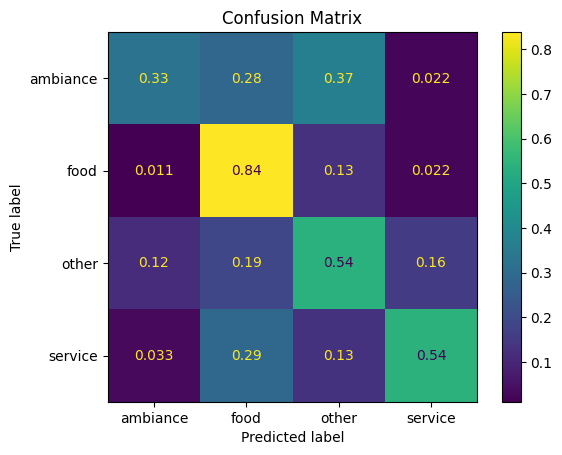

In [ ]:
# CODE HERE
from sklearn.metrics._plot.confusion_matrix import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions( train_data['final_label'].tolist(), predictions, normalize = 'true')
plt.title('Confusion Matrix')
plt.show()


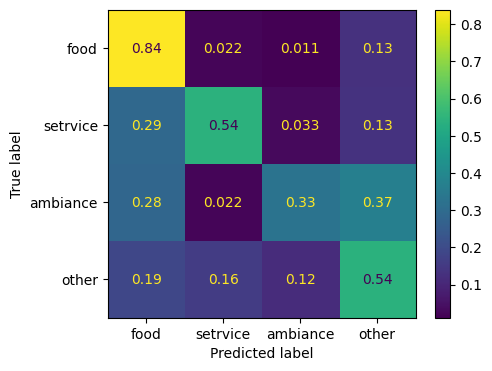

In [ ]:
# DO NOT RUN THIS CELL - this gives you an idea of expected output. Your results might differ slightly

###<Font color = 'dodgerblue'>**Conclusions from the Confusion Matrix** </font>

What do you conclude from the Confusion Matrix?

Above is the confusion matrix for multi-label review dataset. Since the above matrix is normalize over true labels, above diagonal values in the matrix correspond to Recall values for each class. According to the matrix, 'food' is the best performing category with highest recall. We can see that out of actual reviews regarding 'food' labels 84% of them were predicted as 'food' labels.

Similarly, we can interpret that the out of all 'ambiance' reviews only 2.2% were labelled as service. Moreover, 13% of 'food' reviews were labelled as 'other'.


We can conclude that this a decent model with high recall for 'food' labels





## <Font color = 'dodgerblue'>**Task2 : Change hypothesis template**. </font>

In this experiment, we are exploring the impact of changing the hypothesis template in a zero-shot classification model. The default template used in the pipeline is **"This example is {}"**. In the experiment the default template is being replaced with a domain-specific template to classify restaurant reviews into categories like food, service, ambiance, and other.

### Steps:

1. **Modify Hypothesis Template:** Adjust the template to better fit the context of restaurant reviews.
2. **Evaluate Model:** Apply the modified template and report accuracy, a classification report, and confusion matrix.
3. **Compare Results:** Analyze the findings in comparison to the previous experiment using the default template.

### Conclusion:

Changing the hypothesis template may lead to variations in model performance, possibly improving accuracy in certain categories. The comparison between the experiments can reveal insights into how the model interprets premises differently with various templates, helping to tailor the model to specific tasks or domains.

### <Font color = 'dodgerblue'>**Create a list of reviews**

In [ ]:
# create a list of reviews (hint use column.tolist() to convert numpy array series to python list)
texts_train = train_data['text'].tolist()  # CODE HERE

# list of labels
candidate_labels = train_data['final_label'].unique().tolist() # CODE HERE
candidate_labels

['food', 'service', 'other', 'ambiance']

### <Font color = 'dodgerblue'>**Get Probabilities**

In the previous experiment, you only passed sequences and candiadte labels. Since you did not pass any hypothesis template, the classifier used the default template "This example is {}." Now, in this experiment, you will introduce a custom hypothesis template to replace the default. The suggested custom template is "This review is related to the restaurant's {}." By specifying a template more aligned with the context of restaurant reviews, you may influence how the classifier interprets the relationship between the premise and each candidate label. Feel free to explore other custom templates that may be suitable for this task, and compare how these changes affect the classification performance.

The syntax is : **```zero_shot_classifier(sequences= , candidate_labels = , hypothesis_template =   )```**

In [ ]:
# pass the sequences, candiadte labels and hypothesis_template to the classifier
# CODE HERE
probs = zero_shot_classifier(sequences = texts_train, candidate_labels = candidate_labels, hypothesis_template = "This review is related to the restaurant's {}." )

probs[0:3]

[{'sequence': "If you love unagi (eel) on rice, you'll absolutely enjoy their version.",
  'labels': ['food', 'other', 'service', 'ambiance'],
  'scores': [0.8286235928535461,
   0.16602034866809845,
   0.002787336939945817,
   0.002568803494796157]},
 {'sequence': 'But it is definitely worth the wait.',
  'labels': ['other', 'food', 'service', 'ambiance'],
  'scores': [0.3562206029891968,
   0.3078744113445282,
   0.24831971526145935,
   0.08758530765771866]},
 {'sequence': 'Sometimes get the Pho w/ rare beef which is decent.',
  'labels': ['food', 'other', 'ambiance', 'service'],
  'scores': [0.8090678453445435,
   0.18316306173801422,
   0.004174663685262203,
   0.0035944220144301653]}]

In [ ]:
probs[0:3]

[{'sequence': "If you love unagi (eel) on rice, you'll absolutely enjoy their version.",
  'labels': ['food', 'other', 'service', 'ambiance'],
  'scores': [0.8286235928535461,
   0.16602034866809845,
   0.002787336939945817,
   0.002568803494796157]},
 {'sequence': 'But it is definitely worth the wait.',
  'labels': ['other', 'food', 'service', 'ambiance'],
  'scores': [0.3562206029891968,
   0.3078744113445282,
   0.24831971526145935,
   0.08758530765771866]},
 {'sequence': 'Sometimes get the Pho w/ rare beef which is decent.',
  'labels': ['food', 'other', 'ambiance', 'service'],
  'scores': [0.8090678453445435,
   0.18316306173801422,
   0.004174663685262203,
   0.0035944220144301653]}]

### <Font color = 'dodgerblue'>**Get Predictions**
- The output from the classifier will give you the probbaility for each label
- The label with the highest probbaility should be your prediction
- You might need to use more than one line of the code to complete this step

In [ ]:
predictions =  [review['labels'][np.argmax(review['scores'])] for review in probs]

In [ ]:
# get first five preeictions
predictions[0:5]

['food', 'other', 'food', 'food', 'other']

### <Font color = 'dodgerblue'>**Accuracy**
- You might need to use more than one line of the code to complete this step
- Now you have the actual Label and predicted Label for each sentence.
- Calculate the overall acacuracy (Hint : you can use accuracy_score form from sklearn - `from sklearn.metrics import accuracy_score`


In [ ]:
accuracy = accuracy_score(predictions, train_data['final_label'].tolist())*100
accuracy

78.76712328767124

In [ ]:
# DO NOT RUN THIS CELL - If you have done everything correctly, you should get accurtacy close to reported below
accuracy

78.76712328767124

### <Font color = 'dodgerblue'>**Classification Report**
- Print the classification report
- HINT- `from sklearn.metrics import classification_report`

In [ ]:
# print classification report
class_report =  classification_report(train_data['final_label'].tolist(), predictions)
print(class_report)

              precision    recall  f1-score   support

    ambiance       0.90      0.41      0.57        46
        food       0.88      0.84      0.86       279
       other       0.60      0.91      0.72       139
     service       0.93      0.68      0.78       120

    accuracy                           0.79       584
   macro avg       0.83      0.71      0.73       584
weighted avg       0.83      0.79      0.79       584



In [ ]:
# DO NOT RUN THIS CELL - If you have done everything correctly, your report should look similar

              precision    recall  f1-score   support

    ambiance       0.90      0.41      0.57        46
        food       0.88      0.84      0.86       279
       other       0.60      0.91      0.72       139
     service       0.93      0.68      0.78       120

    accuracy                           0.79       584
   macro avg       0.83      0.71      0.73       584
weighted avg       0.83      0.79      0.79       584



### <Font color = 'dodgerblue'>**Compare the classification report** </font>

Compare the classification report with previous experiment and provide your conclusion.

YOUR RESPONSE HERE


Accuracy- From the above report we can see that the model obtains a decent 79% overall accuracy, an improvement over 67% without proper hypothesis template. Moreover, both the macro avg and weighted avg accuracy has increased to 79% and 73%.

Precision- precision scores for all the labels have drastically increased. highest score corresponding to 'service' label of 93% and lowest 60% for other. This suggests that out of all the reviews labelled as other only 60% of them actually belong to other.

Recall - Same with recall scores for all labels have increased. highest score corresponding to 'other' label of 91% and lowest 41% for 'ambiance'. This suggests that out of all the reviews that were of 'ambiance' only 41% of them actually predicted as 'ambiance'. We can see clearly see that the tradeoff between precision and recall between classes. Classes with high precision have low recall and vice versa.

F1 score: Being the balance of both precision and recall, we can see that the increase in this as well compared to the task without introduction of hypothesis template.

Support: support doesnt change as it indicates the number of actual samples in those labels.

Avg: weighted and macro avg of all labels have increased over previous model

In conclusion, the addition of hypothesis template drastically helped the model predict accurate results compared to using default hypothesis.





### <Font color = 'dodgerblue'>**Confusion Matrix**
- You might need to use more than one line of the code to complete this step
- Print confusionm matrix
- Hint:use ConfusionMatrixDisplay.from_predictions from sklearn

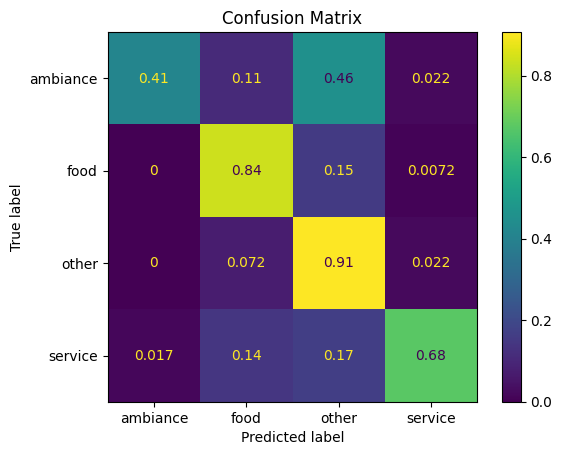

In [ ]:
# CODE HERE
ConfusionMatrixDisplay.from_predictions( train_data['final_label'].tolist(), predictions, normalize = 'true')
plt.title('Confusion Matrix')
plt.show()

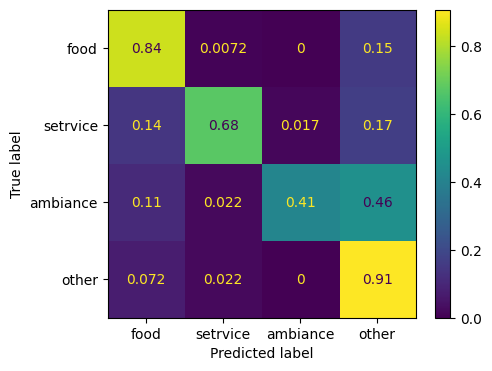

In [ ]:
# DO NOT RUN THIS CELL - this gives you an idea of expected output. Your results might differ slightly

###<Font color = 'dodgerblue'>**Conclusions from the Confusion Matrix** </font>

What do you conclude from the Confusion Matrix (compare with previous experiment)?

YOUR RESPONSE HERE

Above is the confusion matrix for multi-label review dataset with Hypothesis Template. Since the above matrix is normalize over true labels, above diagonal values in the matrix correspond to Recall values for each class. According to the matrix, 'other' is the best performing category with highest recall. We can see that out of actual reviews regarding 'other' labels 91% of them were predicted as 'other' label.

Similarly, we can interpret that the out of all 'ambiance' reviews only 2.2% were labelled as service. Moreover, 0% of 'food' reviews were labelled as 'other'. However, 46% of 'ambiance' reviews were labelled as 'other', which is bad.

We can conclude that this a decent model with high recall for 'food' and 'other' labels. This model with hypothesis template have better chance of predicting actual labels correctly.





## <Font color = 'dodgerblue'>**Task3 : Use threshold probbaility to classify Others**.




In this next experiment, you will explore a nuanced approach to classification by **only considering the labels 'food', 'service', and 'ambiance'**. This is a departure from the previous experiments, where you also included 'other' as a label, and it brings some key distinctions:

Unlike traditional classification, where the probabilities across all labels sum to one, in this experiment, you'll assess the probabilities for just the three given labels.

By not including 'other' as a label, you are essentially allowing the model to classify instances into 'other' if none of the given labels strongly apply. If the maximum probability across 'food', 'service', and 'ambiance' is less than the threshold, the instance is classified as 'other'.

This approach not only recognizes that some instances may not fit neatly into one of the specific categories but also aims to refine the handling of those instances. It encourages a more flexible and discerning classification, possibly reducing misclassification.

The task will allow you to explore how this method of classification, guided by a threshold, can impact the model's performance. It offers an insightful comparison with the previous approaches and underlines the significance of understanding the nature of your data, the relationships between categories, and selecting an appropriate classification strategy accordingly.

### <Font color = 'dodgerblue'>**Create a list of reviews**

In [ ]:
# create a list of reviews (hint use column.tolist() to convert numpy array series to python list)
texts_train = train_data['text'].tolist()  # CODE HERE

# list of labels
candidate_labels = ['food', 'ambiance', 'service'] # CODE HERE
candidate_labels

['food', 'ambiance', 'service']

### <Font color = 'dodgerblue'>**Get Probabilities**

Pass the list of text and labels you craeted in the previous step to the classifier to get predictions.

In [ ]:
# pass the sequences, candiadte labels and hypothesis_template to the classifier

# CODE HERE

probs = zero_shot_classifier(sequences = texts_train, candidate_labels = candidate_labels, hypothesis_template = "This review is related to the restaurant's {}." )




In [ ]:
probs[0: 5]

[{'sequence': "If you love unagi (eel) on rice, you'll absolutely enjoy their version.",
  'labels': ['food', 'service', 'ambiance'],
  'scores': [0.9935776591300964, 0.0033422119449824095, 0.003080175258219242]},
 {'sequence': 'But it is definitely worth the wait.',
  'labels': ['food', 'service', 'ambiance'],
  'scores': [0.4782296419143677, 0.38572174310684204, 0.13604862987995148]},
 {'sequence': 'Sometimes get the Pho w/ rare beef which is decent.',
  'labels': ['food', 'ambiance', 'service'],
  'scores': [0.9904888272285461, 0.00511076720431447, 0.004400415811687708]},
 {'sequence': 'Other items on this menu was a crab soup, duck and clams congee, 2 desserts (one chinese and one western) and free appetizers.',
  'labels': ['food', 'service', 'ambiance'],
  'scores': [0.9874482750892639, 0.0063391621224582195, 0.006212588399648666]},
 {'sequence': 'I visited the restaurant for lunch and arrived there just after 12.30pm on a Sunday.',
  'labels': ['food', 'ambiance', 'service'],
  

### <Font color = 'dodgerblue'>**Get Predictions** </font>

In this experiment , you'll be considering three specific categories: 'food', 'service', 'ambiance', and classify any instance that doesn't fit these categories as 'other'. To make this decision, you will use a concept called a threshold.

#### Understanding the Threshold Concept:
The threshold is a cutoff value that helps determine the class labels based on predicted probabilities. Here's how it works:

Imagine your model predicts the following probabilities for a review:
- 'food': 0.7
- 'service': 0.2
- 'ambiance': 0.1

With a threshold of 0.5, you check whether the highest probability (0.7 for 'food') is greater than this threshold. Since 0.7 > 0.5, the review is classified as 'food'. If the highest probability dees not surpass the threshold, you classify the review as 'other'. By adjusting the threshold, you control how confident the model must be to assign a particular label.

**In this experiment, you will use a theshold of 0.8**

In [ ]:
threshold = 0.8

In [ ]:
predictions = [review['labels'][np.argmax(review['scores'])] if np.max(review['scores']) > threshold else 'other' for review in probs]


In [ ]:
# get first five predictions
predictions[0:5]

['food', 'other', 'food', 'food', 'other']

### <Font color = 'dodgerblue'>**Accuracy**
- You might need to use more than one line of the code to complete this step
- Now you have the True Label and predicted Label for each sentence.
- Calculate the overall acacuracy (Hint : you can use accuracy_score form from sklearn - `from sklearn.metrics import accuracy_score`


In [ ]:
accuracy = accuracy_score(predictions, train_data['final_label'].tolist())*100
accuracy

76.02739726027397

In [ ]:
# DO NOT RUN THIS CELL - If you have done everything correctly, you should get accurtacy close to reported below
accuracy

76.02739726027397

**The overall accurtacy has decreased. This might be the result of chosen threshold**

### <Font color = 'dodgerblue'>**Classification Report**
- Print the classification report
- HINT- `from sklearn.metrics import classification_report`

In [ ]:
# print classification report
class_report =  classification_report(train_data['final_label'].tolist(), predictions)
print(class_report)

              precision    recall  f1-score   support

    ambiance       0.95      0.41      0.58        46
        food       0.91      0.85      0.88       279
       other       0.53      0.88      0.66       139
     service       0.93      0.53      0.68       120

    accuracy                           0.76       584
   macro avg       0.83      0.67      0.70       584
weighted avg       0.83      0.76      0.76       584



In [ ]:
# DO NOT RUN THIS CELL - If you have done everything correctly, your report should look similar

              precision    recall  f1-score   support

    ambiance       0.95      0.41      0.58        46
        food       0.91      0.85      0.88       279
       other       0.53      0.88      0.66       139
     service       0.93      0.53      0.68       120

    accuracy                           0.76       584
   macro avg       0.83      0.67      0.70       584
weighted avg       0.83      0.76      0.76       584



### <Font color = 'dodgerblue'>**Compare the classification report** </font>

Compare the classification report with previous experiment and provide your conclusion.

Accuracy- From the above report we can see that the model obtains a decent 76% overall accuracy, a slightly worse over 76% with threshold of 0.8. Moreover, both the macro avg and weighted avg accuracy has decreased to 70% and 76%.

Precision- precision scores for all the labels decreased for some labels drastically and slightly increased for other labels. highest score corresponding to 'ambiance' label of 95% and lowest 53% for other. This suggests that out of all the reviews labelled as 'other' only 53% of them actually belong to other, which worse than the previous experiment

Recall - Same with recall scores for all labels have increased. highest score corresponding to 'other' label of 88% and lowest 41% for 'ambiance'. This suggests that out of all the reviews that were of 'ambiance' only 41% of them actually predicted as 'ambiance'. We can see clearly see that the tradeoff between precision and recall between classes. Classes with high precision have low recall and vice versa. Recall has decreased over previous experiment

F1 score: Being the balance of both precision and recall, we can see that the increase in this as well compared to the task without threshold.

Support: support doesnt change as it indicates the number of actual samples in those labels.

Avg: weighted and macro avg of all labels have increased over previous model

In conclusion, the use of high value of 0.8 as threshold worsen the prediction of model.




### <Font color = 'dodgerblue'>**Confusion Matrix**
- You might need to use more than one line of the code to complete this step
- Print confusionm matrix
- Hint:`from sklearn.metrics import confusion_matrix``

In [ ]:
confusion_matrix(train_data['final_label'].tolist(), predictions, normalize = 'true')

array([[0.41304348, 0.06521739, 0.52173913, 0.        ],
       [0.        , 0.85304659, 0.14336918, 0.00358423],
       [0.00719424, 0.07913669, 0.88489209, 0.02877698],
       [0.        , 0.08333333, 0.38333333, 0.53333333]])

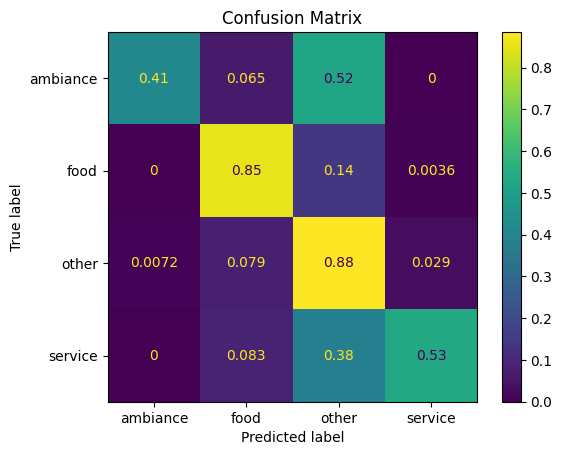

In [ ]:
# CODE HERE
ConfusionMatrixDisplay.from_predictions( train_data['final_label'].tolist(), predictions, normalize = 'true')
plt.title('Confusion Matrix')
plt.show()


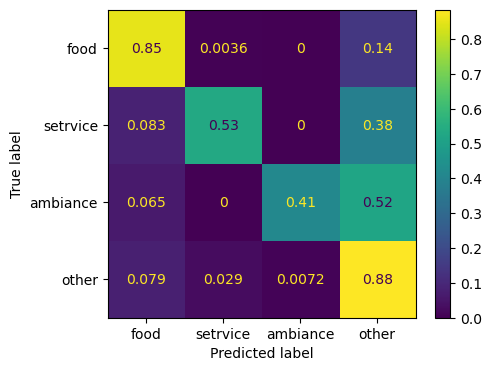

In [ ]:
# DO NOT RUN THIS CELL - this gives you an idea of expected output. Your results might differ slightly

###<Font color = 'dodgerblue'>**Conclusions from the Confusion Matrix** </font>

What do you conclude from the Confusion Matrix (compare with previous experiments)?

YOUR RESPONSE HERE

Above is the confusion matrix for multi-label review dataset with threshold. Since the above matrix is normalize over true labels, above diagonal values in the matrix correspond to Recall values for each class. According to the matrix, 'other' is the best performing category with highest recall. We can see that out of actual reviews regarding 'other' labels 88% of them were predicted as 'other' label.

Similarly, we can interpret that the out of all 'ambiance' reviews 0% were labelled as 'service' and 0% of 'food' reviews were labelled as 'other'. However, 52% of 'ambiance' reviews were labelled as 'other', which is bad.

We can conclude that this is slightly worse model with low recall compared to previous experiment for 'food' and 'other' labels. This model with high threshold for classification have worse chance of predicting actual labels correctly. This could be improved by lowering the value of the threshold.


## <Font color = 'dodgerblue'>**BONUS TASK (Not Graded) - Function to choose threshold to maximize accuracy**.

Let us assume that our business goal is to maximize accuracy.
Write a function to determine the optimal threshold (maximum accuracy for classification) and to provide predictions that align with that threshold. You will also keep track of accuracy at each threshold level.

#### Pseudo Code:

```plaintext
1. Function predict_labels(probs, actual_labels, thresholds=[0.5]):
2.     Initialize best_threshold = 0
3.     Initialize best_accuracy = 0
4.     Initialize best_predictions = empty list
5.     Initialize accuracy_history = empty list
6.     FOR EACH threshold IN thresholds:
7.         Initialize predictions = empty list
8.         FOR EACH prob IN probs:
9.             Extract max_prob as the highest score among the probabilities in prob['scores']
10.            IF max_prob > current threshold THEN:
11.                Append the corresponding label to predictions (e.g., 'food')
12.            ELSE:
13.                Append 'other' to predictions
14.            END IF
15.        END FOR EACH prob
16.        Calculate accuracy using accuracy_score comparing predictions with actual_labels
17.        Append the accuracy to accuracy_history
18.        IF current accuracy > best_accuracy THEN:
19.            Update best_threshold, best_accuracy, and best_predictions
20.        END IF
21.    END FOR EACH threshold
22.    Return best_threshold, best_predictions and accuracy_history
23. END Function
```

In [ ]:
def predict_labels(probs, actual_labels, thresholds=[0.5]):
  # CODE HERE



### <Font color = 'dodgerblue'>**Get best predictions and threshold**
Use the function to get best_threshold, best_predictions and accuracy_history

In [ ]:
thresholds = np.linspace(0.1, 0.95, 18)
thresholds

array([0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 , 0.55, 0.6 ,
       0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95])

In [ ]:
actual_labels = train_data['final_label'].values

In [ ]:
best_threshold, best_predictions, accuracy_history =  # CODE HERE

In [ ]:
best_threshold

In [ ]:
# DO NOT RUN THIS CELL - your best threshold will be close to the result below

0.6

In [ ]:
best_predictions[0:5]

### <Font color = 'dodgerblue'>**Accuracy**
Plot accuracy_history against thresholds


In [ ]:
# CODE HERE

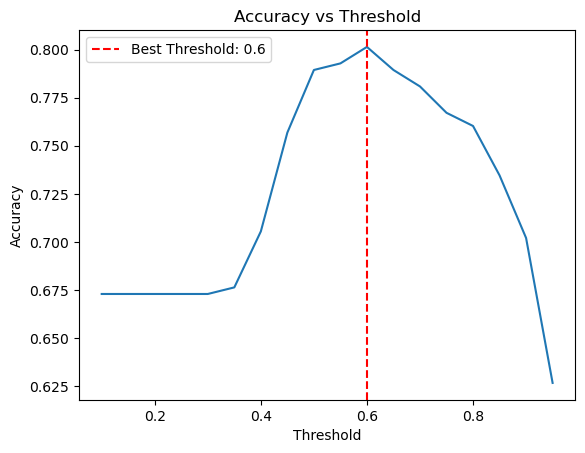

In [ ]:
# DO NOT RUN THIS CELL - this gives you an idea of how the graog will look


In [ ]:
# Best  Accuracy
accuracy = # CODE HERE
accuracy

In [ ]:
# DO NOT RUN THIS CELL - If you have done everything correctly, you should get accurtacy close to reported below

80.13698630136986

Is the accuracy better than Task 2?

**We can see that accuracy has slightly improved from Task2 (where we passed all four labels)**

### <Font color = 'dodgerblue'>**Confusion Matrix**

In [ ]:
# CODE HERE


In [ ]:
# CODE HERE

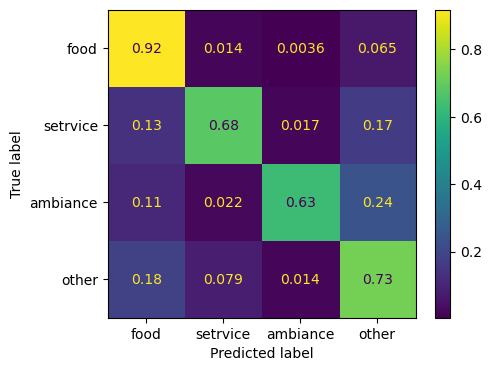

In [ ]:
# DO NOT RUN THIS CELL - this gives you an idea of expected output. Your results might differ slightly